In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('diabetes.csv')

In [107]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


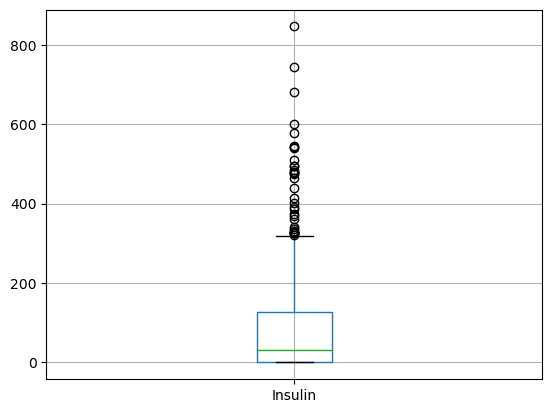

In [25]:
df[['Insulin']].boxplot()
plt.show()

In [26]:
q_cutoff = df['Insulin'].quantile(0.95)
mask = df['Insulin'] < q_cutoff
trimmed_df = df[mask]

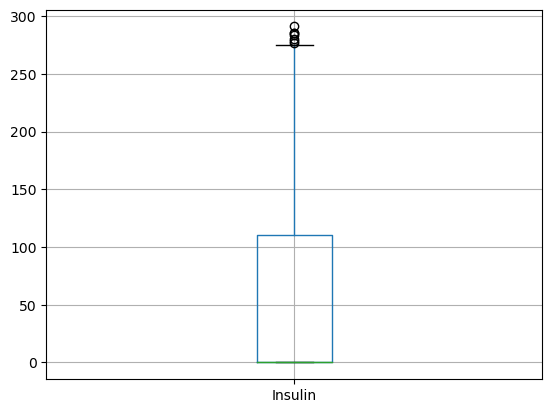

In [29]:
trimmed_df[['Insulin']].boxplot()
plt.show()

In [87]:
mean = df['Insulin'].mean()
std = df['Insulin'].std()
cut_off = std*3

lower, upper = mean - cut_off, mean + cut_off

new_df = df[(df['Insulin']<upper) & (df['Insulin']>lower)]

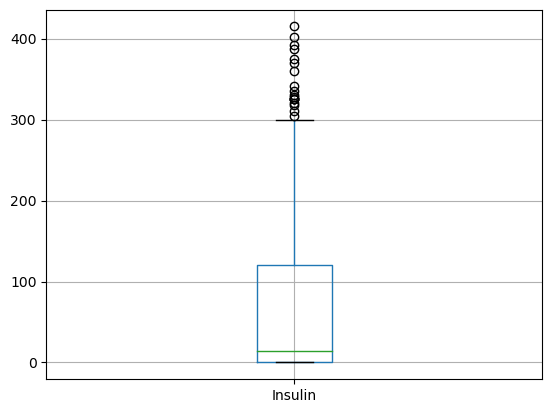

In [88]:
new_df[['Insulin']].boxplot()
plt.show()

In [97]:
# #df.head(10)
# X = df.drop(columns = 'Outcome', axis = 1)
# Y = df['Outcome']
# X.head()

# When trimmin outlyers with the 95th percentile
X = trimmed_df.drop(columns = 'Outcome', axis = 1)
Y = trimmed_df['Outcome']
X.head()

# # when trimming with standard deviation multiples
# X = new_df.drop(columns = 'Outcome', axis = 1)
# Y = new_df['Outcome']
# X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [38]:
sam = df.select_dtypes(include=['int', 'float']).columns
print(sam)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [98]:
# scaler = StandardScaler()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((582, 8), (582,), (146, 8), (146,))

In [100]:
model_SVC = svm.SVC(kernel = 'poly')
model_random_forest = RandomForestClassifier()
model_logistic_regression = LogisticRegression()
ridge_model = RidgeClassifier()
sgd_model = SGDClassifier()

model_SVC.fit(X_train, Y_train)
model_random_forest.fit(X_train, Y_train)
model_logistic_regression.fit(X_train, Y_train)
ridge_model.fit(X_train, Y_train)
sgd_model.fit(X_train, Y_train)

SGDClassifier()

In [101]:
SVC_train_pred = model_SVC.predict(X_train)
SVC_test_pred = model_SVC.predict(X_test)

RFC_train_pred = model_random_forest.predict(X_train)
RFC_test_pred = model_random_forest.predict(X_test)

lg_train_pred = model_logistic_regression.predict(X_train)
lg_test_pred = model_logistic_regression.predict(X_test)

rg_train_pred = ridge_model.predict(X_train)
rg_test_pred = ridge_model.predict(X_test)

sgd_train_pred = sgd_model.predict(X_train)
sgd_test_pred = sgd_model.predict(X_test)

print('SVC Model Accuracy Train:',accuracy_score(Y_train, SVC_train_pred))
print('SVC Model Accuracy Test:',accuracy_score(Y_test, SVC_test_pred))
print('Random Forest Classifier Model Accuracy Train:',accuracy_score(Y_train, RFC_train_pred))
print('Random Forest Classifier Model Accuracy test:',accuracy_score(Y_test, RFC_test_pred))
print('Logistic Regression Model Accuracy Train:',accuracy_score(Y_train, lg_train_pred))
print('Logistic Regression Model Accuracy test:',accuracy_score(Y_test, lg_test_pred))
print('Ridge Model Accuracy Train:',accuracy_score(Y_train, rg_train_pred))
print('Ridge Model Accuracy test:',accuracy_score(Y_test, rg_test_pred))
print('SGD Model Accuracy Train:',accuracy_score(Y_train, sgd_train_pred))
print('SGD Model Accuracy test:',accuracy_score(Y_test, sgd_test_pred))

SVC Model Accuracy Train: 0.8041237113402062
SVC Model Accuracy Test: 0.7808219178082192
Random Forest Classifier Model Accuracy Train: 1.0
Random Forest Classifier Model Accuracy test: 0.8013698630136986
Logistic Regression Model Accuracy Train: 0.7783505154639175
Logistic Regression Model Accuracy test: 0.8082191780821918
Ridge Model Accuracy Train: 0.7766323024054983
Ridge Model Accuracy test: 0.815068493150685
SGD Model Accuracy Train: 0.7474226804123711
SGD Model Accuracy test: 0.7602739726027398


In [21]:
print(train_acc, test_acc)

0.7719869706840391 0.7597402597402597


In [22]:
# # input_data = input(*args)
# def data(*args):
#     input_data = input(args)
#     val = float(input_data)
#     return input_data

# print(type(data()))
input_data = (1,146,56,0,0,29.7,0.564,29)    
np_input_data = np.asarray(input_data)
reshaped_np_input_data = np_input_data.reshape(1,-1)
standardized_data = scaler.transform(reshaped_np_input_data)
prediction = model_SVC.predict(standardized_data)
print(prediction)

if (prediction==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[1]
The person is diabetic


C:\Users\itani\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# saving the trained model

In [24]:
import pickle

In [25]:
filename = 'diabetes_svm_model.pkl'
pickle.dump(model_SVC, open(filename, 'wb'))

# Loading the saved model

In [25]:
loaded_model = pickle.load(open('trained_model.csv', 'rb'))

In [28]:
input_data = (1,146,56,0,0,29.7,0.564,29)    
np_input_data = np.asarray(input_data)
reshaped_np_input_data = np_input_data.reshape(1,-1)
prediction = loaded_model.predict(reshaped_np_input_data)
print(prediction)

if (prediction==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
pip install graphviz

     -------------------------------------- 47.0/47.0 kB 107.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install pydotplus

     ------------------------------------ 278.7/278.7 kB 238.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=c9880bcc2d233d642dbb8c653b682ddd500ed0edb444e5da4970378ff0d6e68e
  Stored in directory: c:\users\itani\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [35]:
pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'kneed'

In [38]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [39]:
import scipy.cluster.hierarchy as shc

In [40]:
from sklearn.decomposition import PCA